In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\logic\Documents\datascience\mushrooms.csv')
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
df.shape

(8124, 23)

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
for col in df.columns :
   df[col] = pd.get_dummies(df[col])

In [6]:
#One hot encoded data
df.head(10)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
5,1,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,1,1,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9,1,1,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
#X and Y
X = df.iloc[:,df.columns !='class']
y = df.iloc[:,df.columns == 'class']

<AxesSubplot:xlabel='class', ylabel='count'>

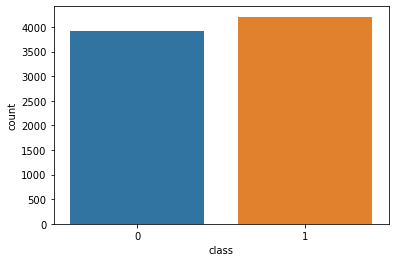

In [8]:
import seaborn as sns
sns.countplot(x='class',data=df)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

y_train.dtypes


class    uint8
dtype: object

In [10]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()

In [11]:
rclf.fit(X_train,y_train)

<ipython-input-11-0b21a8315ce8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rclf.fit(X_train,y_train)


RandomForestClassifier()

In [12]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
y_pred = rclf.predict(X_test)
print(len(X_test))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

2438
0.9917965545529123
0.9960691823899371
[[1151   15]
 [   5 1267]]


In [13]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: name 'metrics' is not defined

# ---------------------------------------------------------------------

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
iris

In [ ]:
print(iris.feature_names)

In [ ]:
print(iris.target_names)

In [ ]:
# Creating a DataFrame of given iris dataset.
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head(5)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y=data['species']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
clf1=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train,y_train)

y_pred=clf1.predict(X_test)

In [ ]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
feature_imp = pd.Series(clf1.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# GridSearchCV

In [14]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

In [15]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [16]:
rf = RandomForestClassifier()

In [17]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [18]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\logic\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.83485647 0.85543757 0.84576917 0.83468521 0.85349353 0.84365325
 0.84769636 0.8492872         nan        nan        nan        nan
 0.85033627 0.85403082 0.85825307 0.85473442 0.8672242  0.85403097
 0.85174425 0.84611541        nan        nan        nan        nan
 0.83292913 0.8385586  0.83732667 0.83926158 0.83591374 0.8297629
 0.83064241 0.83064241        nan        nan        nan        nan
 0.98733787 0.99138268 0.99067908 0.99050317 0.98628138 0.99103072
 0.99120678 0.99085482        nan        nan        nan        nan
 0.99067892 0.99085482 0.99103072 0.99138253 0.99138253 0.99103072
 0.99103072 0.99103072        nan        nan        nan        nan
 0.99103072 0.99103072 0.99103072 0.99103072 0.99103072 0.99138253
 0.99103072 0.99103072        nan        nan        nan        nan
 0.99173448 0.99103072 0.99103072 0.99103072 0.9910307

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

# All Techniques Of Hyper Parameter Optimization
### GridSearchCV
### RandomizedSearchCV
### Bayesian Optimization -Automate Hyperparameter Tuning (Hyperopt)
### Sequential Model Based Optimization(Tuning a scikit-learn estimator with skopt)
### Optuna- Automate Hyperparameter Tuning
### Genetic Algorithms (TPOT Classifier)

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import pandas as pd
df=pd.read_csv(r'C:\Users\logic\Documents\datascience\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
import numpy as np
df['Glucose']=np.where(df['Glucose']==0,df['Glucose'].median(),df['Glucose'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [22]:
#### Independent And Dependent features
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [23]:
pd.DataFrame(X,columns=df.columns[:-1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72,35,0,33.6,0.627,50
1,1,85.0,66,29,0,26.6,0.351,31
2,8,183.0,64,0,0,23.3,0.672,32
3,1,89.0,66,23,94,28.1,0.167,21
4,0,137.0,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180,32.9,0.171,63
764,2,122.0,70,27,0,36.8,0.340,27
765,5,121.0,72,23,112,26.2,0.245,30
766,1,126.0,60,0,0,30.1,0.349,47


In [24]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [26]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[94 13]
 [20 27]]
0.7857142857142857
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.68      0.57      0.62        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



In [28]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[98  9]
 [18 29]]
0.8246753246753247
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



# Randomized Search Cv

In [29]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [30]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [31]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 890,
 'criterion': 'gini'}

In [40]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [41]:
best_random_grid=rf_randomcv.best_estimator_

In [42]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[93 14]
 [16 31]]
Accuracy Score 0.8051948051948052
Classification report:               precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



# GridSearch CV

In [ ]:
rf_randomcv.best_params_

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [890], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [400, 500, 600, 700, 800]}


In [33]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [890],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [400, 500, 600, 700, 800]},
             verbose=2)

In [34]:

grid_search.best_estimator_

RandomForestClassifier(max_depth=890, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=4, n_estimators=600)

In [36]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=890, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=4, n_estimators=600)

In [37]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[97 10]
 [15 32]]
Accuracy Score 0.8376623376623377
Classification report:               precision    recall  f1-score   support

           0       0.87      0.91      0.89       107
           1       0.76      0.68      0.72        47

    accuracy                           0.84       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.83      0.84      0.83       154



# Automated Hyperparameter Tuning
Automated Hyperparameter Tuning can be done by using techniques such as

### Bayesian Optimization
### Gradient Descent
### Evolutionary Algorithms
# Bayesian Optimization
##### Bayesian optimization uses probability to find the minimum of a function. The final aim is to find the input value to a function which can gives us the lowest possible output value.It usually performs better than random,grid and manual search providing better performance in the testing phase and reduced optimization time. In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function fmin.

##### Objective Function = defines the loss function to minimize.
##### Domain Space = defines the range of input values to test (in Bayesian Optimization this space creates a probability distribution for each of the used Hyperparameters).
##### Optimization Algorithm = defines the search algorithm to use to select the best input values to use in each new iteration.